# Jacobi

## 1. $ X = BX + F $

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
B1 = np.array([[0, -0.06, 0.02],
             [-0.03, 0, 0.05],
             [-0.01, 0.02, 0]])

F1 = np.array([[2, 3, 5]]).T

In [66]:
def Jacobi_X(B, F, error=0.0001, X0=None, plot=False):
    if (X0 == None):
        X = np.ones_like(F)
    else:
        X = X0

    i = 0
    X_new = np.dot(B, X) + F
    Diff = 1
    lis = []
    while(Diff > error):
        Diff = np.linalg.norm(X_new - X, ord=np.inf)
        X = X_new
        lis.append(X)
        X_new = np.dot(B, X) + F
        i = i + 1
        #print("Loop {}".format(i))
        #print(X)
        #print("\n")
        
    
    print("Last Loop {}".format(i+1))
    print("\n")
    print(X)
    print("\n")
    
    if (plot == False):
        return X
    else:
        return X, lis

## 2. $AX = b$

In [8]:
A1 = np.array([[4, 0.24, -0.08],
             [0.09, 3, -0.15],
             [0.04, -0.08, 4]])
b1 = np.array([[8, 9, 20]]).T

In [9]:
def trans_A_to_B(A, b):
    k = A.shape[0]
    for i in range(k):
        b[i] = b[i]/A[i, i]
        A[i] = A[i]/A[i, i]    

    B = np.eye(A.shape[0])
    B = B - A
    F = b
    
    return B, F

In [10]:
B1, F1 = trans_A_to_B(A1, b1)
Jacobi_X(B1, F1)

Last Loop 6


[[1.90919876]
 [3.19496307]
 [5.04480681]]




array([[1.90919876],
       [3.19496307],
       [5.04480681]])

## 验证

In [11]:
A1 = np.array([[1., 0.004, 0.01, 0.05],
             [0.01, 2., 0.008, 0.009],
             [0.02, 0.03, 5., 0.04],
             [0.04, 0.03, 0.06, 9.]])
b1 = np.array([[10., 2., 7., 9.]]).T

In [88]:
B1, F1 = trans_A_to_B(A1, b1)
X, X_plot = Jacobi_X(B1, F1, error=0.00000001, plot=True)

Last Loop 8


[[9.93558032]
 [0.94068708]
 [1.34706375]
 [0.94372582]]




In [89]:
X_plot = np.array(X_plot)

In [90]:
X_plot[:, 0]

array([[9.936     ],
       [9.93295622],
       [9.93560713],
       [9.93557926],
       [9.93558034],
       [9.93558032],
       [9.93558032]])

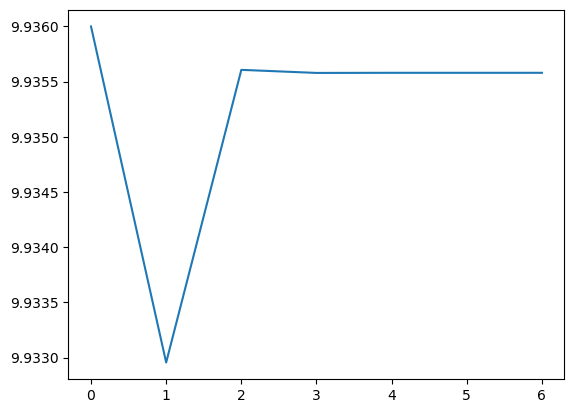

In [91]:
plt.plot(X_plot[:, 0])